In [2]:
from dotenv import load_dotenv
from scipy.special import softmax
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import matplotlib.pyplot as plt
import os
import pandas as pd
import re 
import tweepy 
load_dotenv()

C:\Users\AMD\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


True

API authenticatoin

In [3]:
twitterApiKey = os.getenv("API_key")
twitterApiSecret = os.getenv("API_secret_key")
twitterApiAccessToken = os.getenv("Access_token")
twitterApiAccessTokenSecret = os.getenv("Access_token_secret")
auth = tweepy.OAuthHandler(twitterApiKey,twitterApiSecret)
api = tweepy.API(auth)

Extracting tweets

In [4]:
tweets=[]

# search the keyword to extrat from twitter
query = 'AntManAndTheWaspQuantumania'

for tweet in api.search_tweets(q=query, lang="en", count=100, tweet_mode='extended'):

  # remove website links, hashtags, usernames and retweet tags
  txt = re.sub(f'(\w+:\/\/\w+.\w+\/\w*)|#\w*|@[\w\d]+|\u202f|:|\n|^RT ', "", tweet._json['full_text']).strip()

  # to avoid duplication of tweets
  if txt not in tweets:
    tweets.append(txt)
tweets

['Kang did not die. became a Quantum Temporal Wave.A Timequake.And Al…',
 'jonathan majors and michelle pfeiffer are great! the rest of the movie? not so much 👎🏼',
 'Weekend Box Office Forecast ANT-MAN AND THE WASP QUANTUMANIA to Conquer Again, COCAINE BEAR and JESUS REVOLUTION Counter w…',
 'New poster for',
 'Ant-Man and the Wasp Quantumania Breakdown and Discussion     …',
 'This is giving me Sweet Tooth vibes from that Twisted Metal video game!  Hope (pun intended) that this one drivable in the Vev…',
 'Ant-sized man, larger than life movie. 🐜 Read what we know about  so far over on our blog!…',
 'Us during  this weekend! 🤫🐜💥',
 'The hype is REAL! Can’t wait to see these stars on the big screen ASAP!…',
 'He became sentient Orange Energy that can manipulate timelines.Kinda like someone else I used to be married to...Hmm..._______',
 "is saying some shit between the lines. It'd be wise to listen. Legit liked it.",
 'With Scott Lang, even a trip to the Quantum Realm feels like campin

Load model

In [5]:
roberta = 'cardiffnlp/twitter-roberta-base-sentiment'
model = AutoModelForSequenceClassification.from_pretrained(roberta)

Load tokenizer

In [6]:
tokenizer = AutoTokenizer.from_pretrained(roberta)

In [7]:
labels = ['Negative', 'Neutral', 'Positive']

Sentiment Anaysis

In [8]:
sentiments = []
for tweet in tweets:
    encoded_tweet = tokenizer(tweet, return_tensors='pt')
    output = model(**encoded_tweet)
    scores = softmax(output[0][0].detach().numpy())
    sentiments.append(max(list(zip(scores, labels)))) 

In [9]:
# put the data in the tabular format
tweet_data = pd.DataFrame()
tweet_data['tweets'] = tweets
tweet_data[['score', 'sentiment']] = sentiments

In [10]:
tweet_data.head(10)

,tweets,score,sentiment
0,Kang did not die. became a Quantum Temporal Wa...,0.788966,Neutral
1,jonathan majors and michelle pfeiffer are grea...,0.879343,Positive
2,Weekend Box Office Forecast ANT-MAN AND THE WA...,0.893882,Neutral
3,New poster for,0.824665,Neutral
4,Ant-Man and the Wasp Quantumania Breakdown and...,0.894237,Neutral
5,This is giving me Sweet Tooth vibes from that ...,0.858598,Positive
6,"Ant-sized man, larger than life movie. 🐜 Read ...",0.545592,Positive
7,Us during this weekend! 🤫🐜💥,0.649762,Positive
8,The hype is REAL! Can’t wait to see these star...,0.987533,Positive
9,He became sentient Orange Energy that can mani...,0.708442,Neutral


<Axes: >

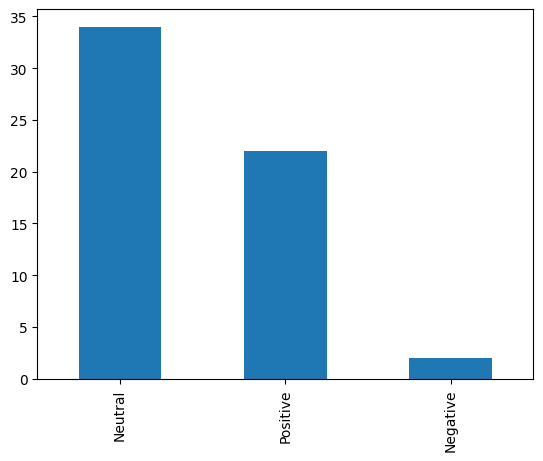

In [11]:
tweet_data['sentiment'].value_counts().plot.bar()

References

https://developer.twitter.com/en/docs/twitter-api/v1/tweets/search/api-reference/get-search-tweets